In [6]:
#サンプルコード

n_squares = 4
small_board_list = [1] #リストに１を代入
for _ in range(n_squares - 1):#3回転ループ
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [7]:
# サンプルコード
import numpy as np

small_board_ndarray = np.array(small_board_list) #numpy配列に変換
print("4マスの板に小麦を並べる（ndarray） : {}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray） : [1 2 4 8]


# 【問題1】2×2マスのチェス盤の小麦の数

In [8]:
# print(small_board_ndarray)
print(small_board_ndarray.reshape(2, 2)) #2*2の配列に変換
# print(small_board_ndarray.reshape(2, 2).shape)

[[1 2]
 [4 8]]


# 【問題2】n×mマスへの拡張

In [26]:
#ｎ×ｍマスへの拡張する関数定義

def n_m_array(n, m):
    
    n_m_list = [] # ループ処理した値を格納するリスト
    double = 2 #倍率
    komugi = 0 #小麦の数
    x = n*m #マス目の数
    
    for i in range(x): #マス目の数x回数でループ処理
        komugi = double**i
        n_m_list.append(komugi)
        
    komugi_array = np.array(n_m_list) #リストを配列に変換
    n_m_board = komugi_array.reshape(n, m) #n*mの配列に変換
    
    return n_m_board

n = 8
m = 8

array88 = n_m_array(n, m) #8*8の配列を変数に格納

print("{}*{}マスのチェス盤の小麦の数は\n{}".format(n, m, array88))

2
(8, 8)
8*8マスのチェス盤の小麦の数は
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.611

# 【問題3】小麦の数の合計

In [10]:
# array88 = n_m_array(8, 8) #8*8の配列を変数に格納
print("マス目の合計は{}".format(np.sum(n_m_array(8,8))))

array_list = np.mean(array88, axis=0).tolist() #配列をリストに変換

for i in range(8): #各列ごとの出力をループ処理
    print("{}列目の平均は:{}".format(i+1, array_list[i]))


マス目の合計は1.8446744073709552e+19
1列目の平均は:9042521604759584.0
2列目の平均は:1.808504320951917e+16
3列目の平均は:3.617008641903834e+16
4列目の平均は:7.234017283807667e+16
5列目の平均は:1.4468034567615334e+17
6列目の平均は:2.893606913523067e+17
7列目の平均は:5.787213827046134e+17
8列目の平均は:1.1574427654092268e+18


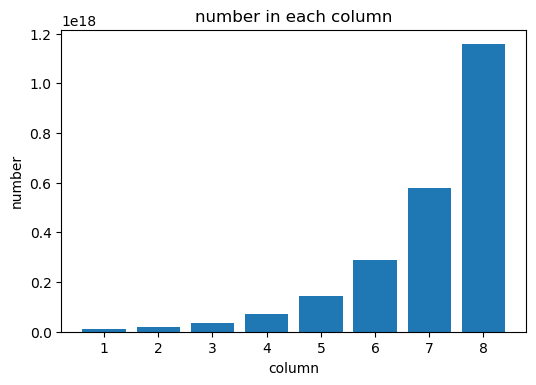

In [11]:
#小麦の数の合計をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

left = np.array([1, 2, 3, 4, 5, 6, 7, 8])

plt.figure(dpi=100)
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(left, np.mean(array88, axis=0))
plt.show()

# 【問題4】小麦の数のヒートマップ

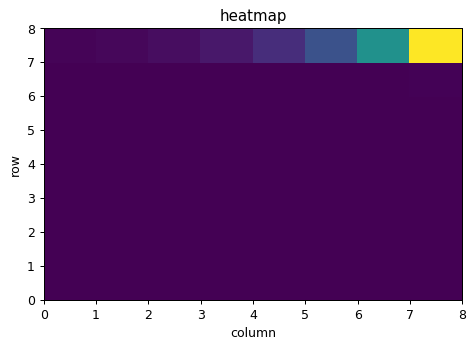

In [12]:
plt.figure(dpi=90)
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(array88)
plt.show()

# 【問題5】後半は前半の何倍か

In [13]:
first_halr = np.sum(array88[0: 4]) #前半にある小麦の数
later_half = np.sum(array88[4: ]) #後半にある小麦の数
# print(first_halr)
# print(later_half)
komugi_times = later_half // first_halr #後半の数を前半の数で割る

print("後半にある小麦の数は前半にある小麦の{}倍".format(komugi_times))

後半にある小麦の数は前半にある小麦の4294967296.0倍


# 【問題6】他の計算方法によるn×mマスへの拡張

### 1．np.append()を使ったバージョン

In [14]:
def nm_array_a(n, m):
    
    x = n*m #ループ回数n*m（マス目の数）
    komugi_array = np.array([1]).astype(np.uint64) #1次元要素1の配列 
    
    for _ in range(x - 1): #ループ処理
        komugi_array = np.append(komugi_array, 2*komugi_array[-1])
        
    return komugi_array

n = 8
m = 8


print("{}×{}マスのチェス盤の小麦の数を記した配列は\n{}".format(n, m, nm_array_a(8, 8)))

8×8マスのチェス盤の小麦の数を記した配列は
[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]


### 2．ブロードキャストを使ったバージョン

In [15]:
def nm_array_b(n, m):
    
    x = n*m # n*m=要素数指定
    x_komugi = np.arange(x).astype(np.uint64) #1次元、要素数xの配列を変数に格納
    komugi_array_a = 2**x_komugi #2のｘ乗した要素の配列を変数に格納
    
    return komugi_array_a

n = 8
m = 8


print("{}×{}マスのチェス盤の小麦の数を記した配列は\n{}".format(n, m, nm_array_a(8, 8)))

8×8マスのチェス盤の小麦の数を記した配列は
[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]


# 【問題7】計算時間の比較

### 1.自作関数バージョン

In [19]:
%%timeit

def n_m_array(n, m):
    
    n_m_list = [] # ループ処理した値を格納するリスト
    double = 2 #倍率
    komugi = 0 #小麦の数
    x = n*m #マスの数
    
    for i in range(x): #ループ処理
        komugi = double**i
        n_m_list.append(komugi)
        
    komugi_array = np.array(n_m_list) #リストを配列に変換
    n_m_board = komugi_array.reshape(n, m) #n*mの配列に変換
    
    return n_m_board

n = 8
m = 8

array88 = n_m_array(n, m) #8*8の配列を変数に格納



31.6 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 2.np.append()を使ったバージョン

In [20]:
%%timeit
def nm_array_a(n, m):
    x = n*m #n*mマス
    komugi_array = np.array([1]).astype(np.uint64) #1次元要素1の配列 
    for _ in range(x - 1): #ループ処理
        komugi_array = np.append(komugi_array, 2*komugi_array[-1])
        
    return komugi_array

n = 8
m = 8


49.8 ns ± 1.25 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### 3.ブロードキャストを使ったバージョン

In [21]:
%%timeit

def nm_array_b(n, m):
    
    x = n*m #n*mマス
    first_komugi = np.arange(x).astype(np.uint64) #1次元要素1の配列を変数に格納
    komugi_array_a = 2**first_komugi #2倍した配列を変数に格納
    
    return komugi_array_a

n = 8
m = 8


51 ns ± 1.07 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### 計算結果を比較と考察。

　計測スピードだけだと、自作関数が一番早く、 ブロードキャストを使用した場合とappend（for）を使用した場合ではあまり差がなかった。  
 
ただ、標準偏差を見ると自作関数の計測結果はデータのバラツキが大きく、ブロードキャストとappendを使用した場合の計測結果はデータのバラツキが少なかった。  
 
 自作関数は、出力する度に計算速度の結果が変わり易く、ブロードキャストとappendを使用した場合は計算速度の結果はあまり変わらない。